In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf

W poniższym przykładzie posłużymy się zestawem danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [3]:
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Zad
Proszę narysować dane za pomoca 
```python
sns.pairplot()
```

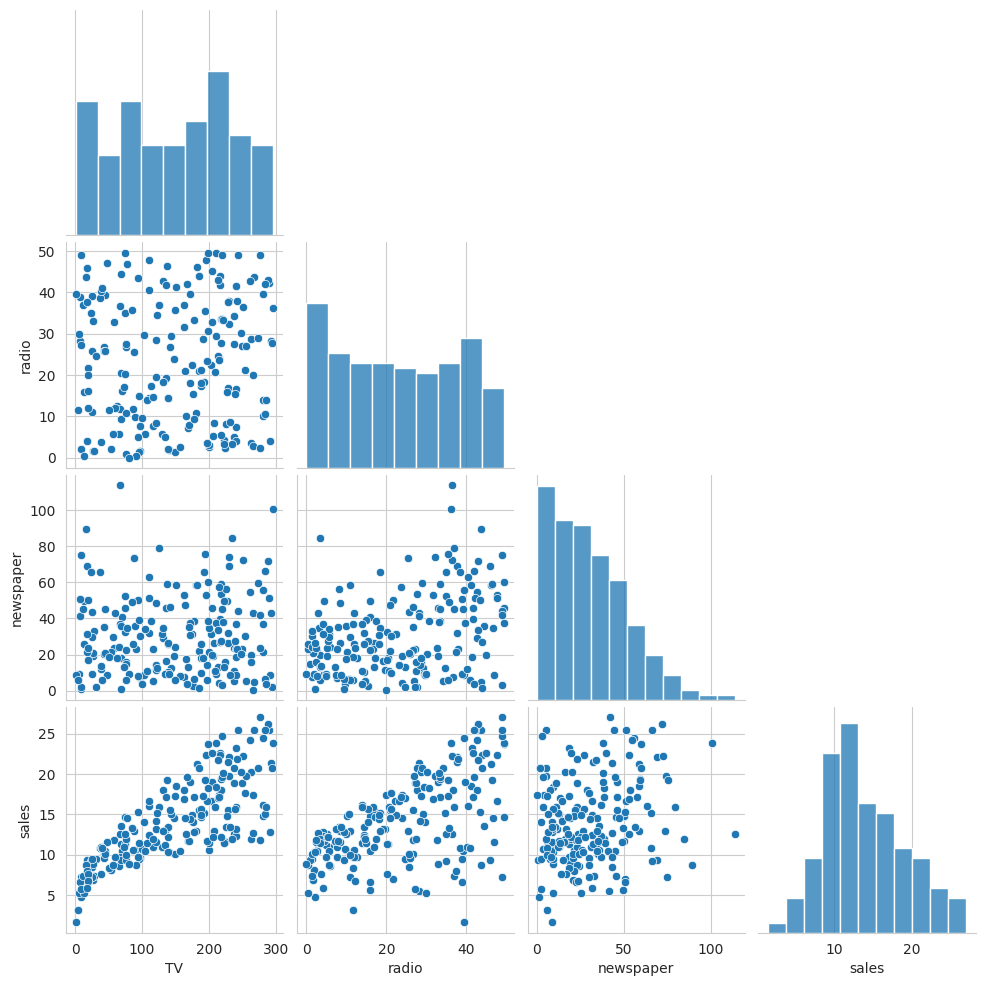

In [6]:
sns.pairplot(df_adv, corner=True)

# Zad
Proszę wyrysować dane za pomoca 
```python
sns.heatmap()
```

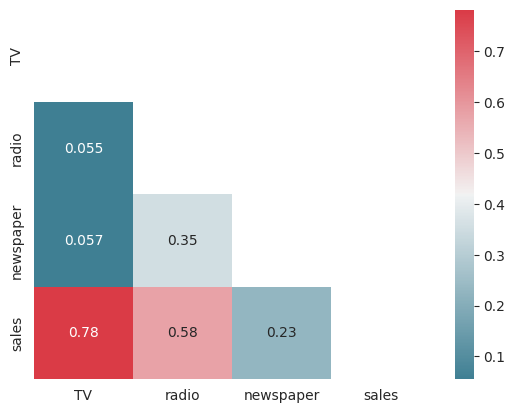

In [4]:
import numpy as np

correlation_matrix = df_adv.corr()

mask = np.triu(correlation_matrix)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_style('white')
x = sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap=cmap)


# Zadanie 1 - Konkurs
Wykonaj model pozwalający przewidzieć zmienną "Sales" na podstawie innych zmiennych.


In [5]:
est = smf.ols(formula='sales ~ I(newspaper)*I(TV)*I(radio)', data=df_adv).fit()
print((est.summary2()))

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.968    
Dependent Variable:     sales              AIC:                  550.9065 
Date:                   2024-04-11 23:43   BIC:                  577.2930 
No. Observations:       200                Log-Likelihood:       -267.45  
Df Model:               7                  F-statistic:          847.3    
Df Residuals:           192                Prob (F-statistic):   1.16e-140
R-squared:              0.969              Scale:                0.88469  
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                    6.5559   0.4655 14.0825 0.0000  5.6377 7.4741
I(newspaper)                 0.0131   0.0172  0.7615 0.4473 -0.0208 0.0471
I(TV)                        0.0197   0.0027  7

In [6]:
import statsmodels.formula.api as smf

# est = smf.ols(formula='sales ~ I(newspaper)*I(TV)*I(radio)', data=df_adv).fit()

est = smf.ols(formula='sales ~ I(newspaper)*I(TV)*I(radio)', data=df_adv).fit()
print((est.summary2()))

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.968    
Dependent Variable:     sales              AIC:                  550.9065 
Date:                   2024-04-11 23:43   BIC:                  577.2930 
No. Observations:       200                Log-Likelihood:       -267.45  
Df Model:               7                  F-statistic:          847.3    
Df Residuals:           192                Prob (F-statistic):   1.16e-140
R-squared:              0.969              Scale:                0.88469  
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                    6.5559   0.4655 14.0825 0.0000  5.6377 7.4741
I(newspaper)                 0.0131   0.0172  0.7615 0.4473 -0.0208 0.0471
I(TV)                        0.0197   0.0027  7

In [7]:
est = smf.ols(formula='sales ~ I(TV) + I(radio) + I(TV**2) +  I(TV):I(radio)  + I(TV**3) + I(TV**4) + I(TV**5) + I(TV**6) ', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.993    
Dependent Variable: sales            AIC:                254.7921 
Date:               2024-04-11 23:43 BIC:                281.1787 
No. Observations:   200              Log-Likelihood:     -119.40  
Df Model:           7                F-statistic:        3817.    
Df Residuals:       192              Prob (F-statistic): 2.31e-202
R-squared:          0.993            Scale:              0.20127  
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          0.0303   0.0009  35.4239 0.0000  0.0286  0.0320
I(TV)              0.4276   0.0125  34.2608 0.0000  0.4030  0.4523
I(radio)           0.0570   0.0038  14.8072 0.0000  0.0494  0.0646
I(TV ** 2)        -0.0090   0.0004 -20.1772 0.0000 -0.0098 -0.0081
I(TV):I(radio

In [8]:
# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~ I(newspaper)+I(TV):I(radio)+np.log(radio+1)', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.935    
Dependent Variable: sales            AIC:                685.7094 
Date:               2024-04-11 23:43 BIC:                698.9027 
No. Observations:   200              Log-Likelihood:     -338.85  
Df Model:           3                F-statistic:        955.0    
Df Residuals:       196              Prob (F-statistic): 1.16e-116
R-squared:          0.936            Scale:              1.7698   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          10.1955   0.3396 30.0181 0.0000  9.5257 10.8653
I(newspaper)        0.0003   0.0046  0.0574 0.9543 -0.0087  0.0093
I(TV):I(radio)      0.0016   0.0000 44.3924 0.0000  0.0015  0.0017
np.log(radio + 1)  -0.6088   0.1356 -4.4884 0.0000 -0.8763 -0.3413
-------------